## Spam Text Detector

### What is the function and usability of this model?

To train the model in understanding and recognizing the pattern of a spam which is presence in the text message file

### Dependencies needed to run the model program

<b> For extraction and data manipulation </b>

Seaborn:        https://seaborn.pydata.org/

Pandas:         https://pandas.pydata.org/

<b> To create prediction model </b>

Scikit Learn:   https://scikit-learn.org/stable/

Tensorflow:     https://www.tensorflow.org/

Keras API:      https://keras.io/

<b> Sketch graph of prediction result </b>

Matplotlib:     https://matplotlib.org/

In [41]:
# Import Pandas library

import pandas as pd

# Read the data source using pandas read_csv() function

data = pd.read_csv('Database/SPAM text message 20170820 - Data.csv')

# Print out the first 5 row of the data

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# Grouping the data and
# calculate the count, unique, top and freq of the message

data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

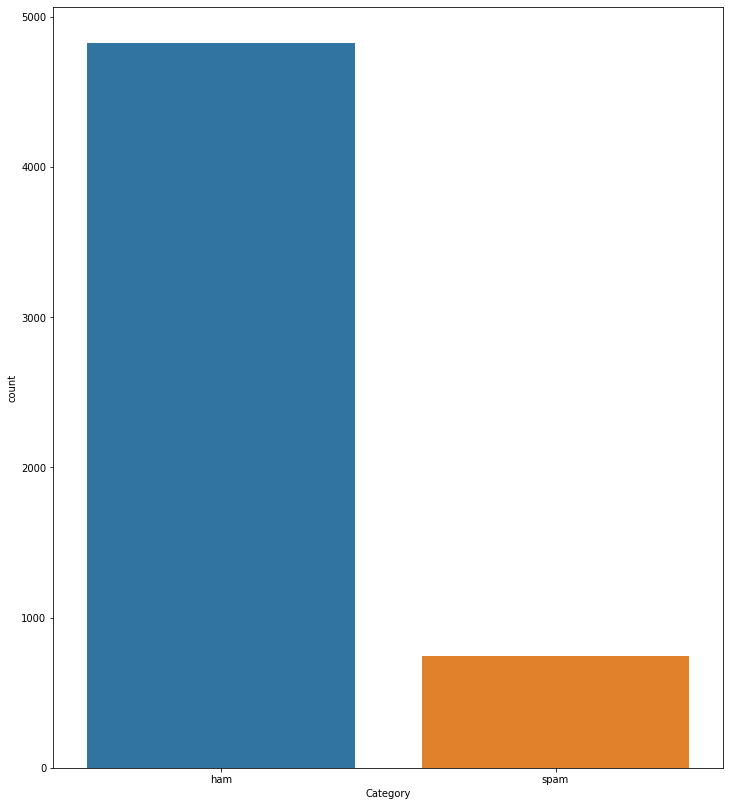

In [43]:
# Import Seaborn library
# Import matplotlib.pyplot

import seaborn as sns
import matplotlib.pyplot as plt

# Print data in a diagram figure ffor visualization

plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [44]:
# Extract the ham data and save it
# To ham_msg variable

ham_msg = data[data.Category == 'ham']
print(ham_msg)

# Extract the spam data and save it
# To spam_msg variable

spam_msg = data[data.Category == 'spam']
print(spam_msg)

# Print out the shape of both ham and spam

print(ham_msg.shape, spam_msg.shape)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
6         ham  Even my brother is not like to speak with me. ...
...       ...                                                ...
5565      ham                                       Huh y lei...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
     Category                                            Message
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...


In [45]:
# extracting the data with a random sequence
# and perserving a maximum length of data as spam_msg

ham_msg = ham_msg.sample(n=len(spam_msg), random_state=1) # random data extracted
print(ham_msg)



# Print the description of ham_msg
print(ham_msg.describe().T)

     Category                                            Message
2535      ham                      Ok enjoy . R u there in home.
1213      ham  Yo, the game almost over? Want to go to walmar...
522       ham                         Shall i come to get pickle
5398      ham  Hi. Hope you had a good day. Have a better night.
700       ham           K..u also dont msg or reply to his msg..
...       ...                                                ...
1085      ham  For me the love should start with attraction.i...
3976      ham  do u think that any girl will propose u today ...
2886      ham                        Ü still attending da talks?
1197      ham  What he said is not the matter. My mind saying...
2213      ham  This is one of the days you have a billion cla...

[747 rows x 2 columns]
         count unique                     top freq
Category   747      1                     ham  747
Message    747    736  Sorry, I'll call later    4


In [46]:
# Print out the shape of ham_msg and spam_msg

print(ham_msg.shape, spam_msg.shape)

(747, 2) (747, 2)


C:\Users\frent\AppData\Local\Temp\ipykernel_22252\2254321039.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)
c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Messages Types')

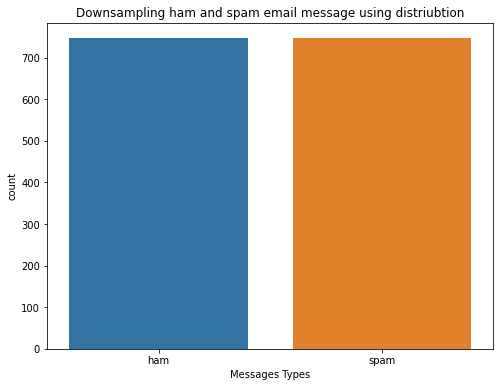

In [47]:
# Append spam_msg array to ham_msg,
# remove the index number without creating a new file
balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)

plt.figure(figsize=(8,6))

# Plot the data into a graph and categorized by category
sns.countplot(balanced_data.Category)

plt.title('Downsampling ham and spam email message using distriubtion')
plt.xlabel('Messages Types')


In [48]:
# Print first five row of the data

balanced_data.head()

,Category,Message
0,ham,Ok enjoy . R u there in home.
1,ham,"Yo, the game almost over? Want to go to walmar..."
2,ham,Shall i come to get pickle
3,ham,Hi. Hope you had a good day. Have a better night.
4,ham,K..u also dont msg or reply to his msg..


In [49]:
# Create a label to classify the message

balanced_data['label'] = balanced_data['Category'].map({'ham':0, 'spam':1})
balanced_data.head()

,Category,Message,label
0,ham,Ok enjoy . R u there in home.,0
1,ham,"Yo, the game almost over? Want to go to walmar...",0
2,ham,Shall i come to get pickle,0
3,ham,Hi. Hope you had a good day. Have a better night.,0
4,ham,K..u also dont msg or reply to his msg..,0


In [50]:
# Import Train_Test_Split function

from sklearn.model_selection import train_test_split

# Split datasets to train and test 80% and 20%

train_msg, test_msg, train_labels, test_labels = train_test_split(balanced_data['Message'],
balanced_data['label'],
test_size=0.2,
random_state=434)

print(test_labels)
print("###")
print(test_msg)

205     0
694     0
183     0
1379    1
703     0
       ..
428     0
775     1
1130    1
1434    1
918     1
Name: label, Length: 299, dtype: int64
###
205                             Ok lor wat time ü finish?
694                           S.i'm watching it in live..
183     HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
1379    URGENT! Your Mobile No 07808726822 was awarded...
703     I can do that! I want to please you both insid...
                              ...                        
428                           I'm hungry buy smth home...
775     -PLS STOP bootydelious (32/F) is inviting you ...
1130    December only! Had your mobile 11mths+? You ar...
1434    This is the 2nd attempt to contract U, you hav...
918     For taking part in our mobile survey yesterday...
Name: Message, Length: 299, dtype: object


In [51]:
# Import Tokenizer and Pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 500
oov_tok = '<OOV>'
max_len = 500

# Assigning Tokenizer() function with the maximum length word
# and token for out of the vocabulary words

token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Updates internal vocab from list of texts

token.fit_on_texts(train_msg)

In [52]:
# Print word index
word_index = token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'i': 6,
 'call': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'and': 11,
 'is': 12,
 '2': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'txt': 21,
 'me': 22,
 'of': 23,
 'with': 24,
 'are': 25,
 '4': 26,
 'from': 27,
 'text': 28,
 'just': 29,
 'get': 30,
 'my': 31,
 'it': 32,
 'be': 33,
 'mobile': 34,
 'stop': 35,
 'only': 36,
 'this': 37,
 'will': 38,
 'claim': 39,
 'no': 40,
 'that': 41,
 'reply': 42,
 'www': 43,
 'not': 44,
 'do': 45,
 'out': 46,
 'we': 47,
 'our': 48,
 'so': 49,
 'at': 50,
 'new': 51,
 'send': 52,
 'prize': 53,
 'can': 54,
 'if': 55,
 'cash': 56,
 'gt': 57,
 'all': 58,
 'lt': 59,
 '150p': 60,
 'uk': 61,
 'please': 62,
 'up': 63,
 'week': 64,
 'nokia': 65,
 'when': 66,
 'win': 67,
 '1': 68,
 'tone': 69,
 'won': 70,
 't': 71,
 'msg': 72,
 'but': 73,
 'who': 74,
 'want': 75,
 'by': 76,
 'how': 77,
 'go': 78,
 'know': 79,
 'com': 80,
 'phone': 81,
 '50': 82,
 'urgent': 83,
 'service

In [53]:
padding_type = 'post'
truncate_type = 'post'

# Transofrm each text to sequence of integers for train msg

Training_seq = token.texts_to_sequences(train_msg)

# Convert to 2D Numpy array with paddings and truncate exceeded text for train msg

Training_pad = pad_sequences(Training_seq, maxlen=50, padding=padding_type, truncating=truncate_type)

In [54]:
# Transform each text to sequence of integers for test msg

Testing_seq = token.texts_to_sequences(test_msg)

# Convert to 2D Numpy array with paddings for train msg

Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding = padding_type, truncating=truncate_type)

In [55]:
# Import Tensorflow library

import tensorflow as tf

# Create model with Embedding Layer, Global Average Pooling, Dense/Fully connected layer and Dropout

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_length=50))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [56]:
# Create a model which calculate the loss entropy between true and predicted labels

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics=['accuracy'],
optimizer='adam')

In [57]:
# Create a terminator if there is no imporvement

epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with another batch of data to help evaluate the loss performance
history = model.fit(Training_pad,
train_labels,
validation_data=(Testing_pad, test_labels),
epochs=epoch,
callbacks=[early_stop],
verbose=2)

Epoch 1/30


C:\Users\frent\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 - 1s - loss: 0.6890 - accuracy: 0.5113 - val_loss: 0.6824 - val_accuracy: 0.4716 - 719ms/epoch - 19ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6481 - accuracy: 0.6929 - val_loss: 0.6168 - val_accuracy: 0.7492 - 99ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.5360 - accuracy: 0.8234 - val_loss: 0.4809 - val_accuracy: 0.8796 - 83ms/epoch - 2ms/step
Epoch 4/30
38/38 - 0s - loss: 0.3756 - accuracy: 0.9163 - val_loss: 0.3381 - val_accuracy: 0.9197 - 82ms/epoch - 2ms/step
Epoch 5/30
38/38 - 0s - loss: 0.2533 - accuracy: 0.9464 - val_loss: 0.2253 - val_accuracy: 0.9431 - 83ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.1901 - accuracy: 0.9523 - val_loss: 0.1785 - val_accuracy: 0.9599 - 68ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.1593 - accuracy: 0.9565 - val_loss: 0.1571 - val_accuracy: 0.9565 - 74ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.1313 - accuracy: 0.9649 - val_loss: 0.1464 - val_accuracy: 0.9632 - 68ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - loss: 0.1

In [58]:
# Test the model

model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 888us/step - loss: 0.1656 - accuracy: 0.9465


[0.16561800241470337, 0.9464883208274841]

Text(0.5, 0, 'epoch')

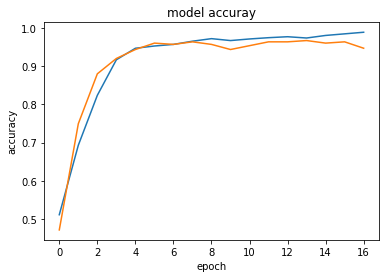

In [59]:
# Plotting the model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuray')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [60]:
# Main Function

def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
                      
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')

    return (model.predict(padded))

"""
def main():
    spam_sample = []
    with open('sample01.txt','r') as textFile:
        textSample = textFile.read()
        spam_sample.insert(0,textSample)
        print(predict_spam(spam_sample))

"""

def main():
    spam_sample=[]
    result = []

    print("****")
    for i in range(10):
        
        with open('sample01.txt','r') as textFile:
            textSample = textFile.read()
            spam_sample.insert(0,textSample)
            spam_sample = [x[1:-1] for x in spam_sample] # To delete the double quotations marks
            a = predict_spam(spam_sample)
            print(type(a))
            print(a)

            a = a[0] # Extract the first element in nested numpy array
            a = a.tolist() # Covert Numpy array to normal array

            print(a)

            result.append(a)
            spam_sample.pop(0)

            textFile.close()


    print("=============")
    print(result)
    print("=============")

main()

****
1/1 [==============================] - 0s 56ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 24ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 17ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.9968771934509277]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
[[0.9968772]]
[0.99687719345092